In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
x=data.iloc[:,3:13]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [5]:
y=data.iloc[:,13]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [7]:
x['Geography']=le.fit_transform(x['Geography'])
x['Gender']=le.fit_transform(x['Gender'])

In [8]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.33,random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [12]:
sc=StandardScaler()

In [13]:
trainx=sc.fit_transform(trainx)
testx=sc.transform(testx)

In [14]:
trainx.shape

(6700, 10)

In [15]:
import tensorflow as tf

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,ReLU,LeakyReLU,Dropout

In [17]:
classifier=Sequential()
classifier.add(Dense(units=10,activation='relu'))
classifier.add(Dense(units=8,activation='relu'))
classifier.add(Dense(units=5,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))

In [18]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
tf.keras.optimizers.Adam(learning_rate=0.01)

In [20]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.005,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,)


In [21]:
model=classifier.fit(trainx,trainy,validation_split=0.3,batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
469/469 [==============================] - 1s 1ms/step - loss: 0.5221 - accuracy: 0.7857 - val_loss: 0.4737 - val_accuracy: 0.7955
Epoch 2/100
469/469 [==============================] - 0s 968us/step - loss: 0.4661 - accuracy: 0.7921 - val_loss: 0.4418 - val_accuracy: 0.8045
Epoch 3/100
469/469 [==============================] - 0s 963us/step - loss: 0.4402 - accuracy: 0.8070 - val_loss: 0.4286 - val_accuracy: 0.8149
Epoch 4/100
469/469 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.8087 - val_loss: 0.4211 - val_accuracy: 0.8174
Epoch 5/100
469/469 [==============================] - 0s 983us/step - loss: 0.4181 - accuracy: 0.8130 - val_loss: 0.4166 - val_accuracy: 0.8124
Epoch 6/100
469/469 [==============================] - 0s 1ms/step - loss: 0.4104 - accuracy: 0.8151 - val_loss: 0.4077 - val_accuracy: 0.8159
Epoch 7/100
469/469 [==============================] - 0s 967us/step - loss: 0.3998 - accuracy: 0.8264 - val_loss: 0.3970 - val_accuracy

In [22]:
# model with Dropout
classifier1=Sequential()
classifier1.add(Dense(units=10,activation='relu'))
classifier1.add(Dropout(0.1))
classifier1.add(Dense(units=8,activation='relu'))
classifier1.add(Dropout(0.15))
classifier1.add(Dense(units=5,activation='relu'))
classifier1.add(Dropout(0.2))
classifier1.add(Dense(units=1,activation='sigmoid'))

In [23]:
classifier1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
model1=classifier1.fit(trainx,trainy,validation_split=0.3,batch_size=10,epochs=100)

Epoch 1/100
469/469 [==============================] - 1s 1ms/step - loss: 0.5597 - accuracy: 0.7501 - val_loss: 0.4744 - val_accuracy: 0.7965
Epoch 2/100
469/469 [==============================] - 0s 1ms/step - loss: 0.4841 - accuracy: 0.7957 - val_loss: 0.4421 - val_accuracy: 0.8139
Epoch 3/100
469/469 [==============================] - 0s 1ms/step - loss: 0.4607 - accuracy: 0.8111 - val_loss: 0.4248 - val_accuracy: 0.8348
Epoch 4/100
469/469 [==============================] - 0s 1ms/step - loss: 0.4462 - accuracy: 0.8132 - val_loss: 0.4150 - val_accuracy: 0.8388
Epoch 5/100
469/469 [==============================] - 0s 962us/step - loss: 0.4375 - accuracy: 0.8173 - val_loss: 0.4032 - val_accuracy: 0.8448
Epoch 6/100
469/469 [==============================] - 0s 961us/step - loss: 0.4280 - accuracy: 0.8264 - val_loss: 0.3976 - val_accuracy: 0.8433
Epoch 7/100
469/469 [==============================] - 0s 983us/step - loss: 0.4146 - accuracy: 0.8262 - val_loss: 0.3928 - val_accuracy: 

Epoch 58/100
469/469 [==============================] - 0s 955us/step - loss: 0.3728 - accuracy: 0.8456 - val_loss: 0.3591 - val_accuracy: 0.8532
Epoch 59/100
469/469 [==============================] - 0s 955us/step - loss: 0.3691 - accuracy: 0.8443 - val_loss: 0.3602 - val_accuracy: 0.8537
Epoch 60/100
469/469 [==============================] - 0s 973us/step - loss: 0.3707 - accuracy: 0.8420 - val_loss: 0.3602 - val_accuracy: 0.8512
Epoch 61/100
469/469 [==============================] - 0s 984us/step - loss: 0.3706 - accuracy: 0.8452 - val_loss: 0.3597 - val_accuracy: 0.8512
Epoch 62/100
469/469 [==============================] - 0s 1ms/step - loss: 0.3720 - accuracy: 0.8424 - val_loss: 0.3594 - val_accuracy: 0.8517
Epoch 63/100
469/469 [==============================] - 0s 948us/step - loss: 0.3733 - accuracy: 0.8458 - val_loss: 0.3588 - val_accuracy: 0.8552
Epoch 64/100
469/469 [==============================] - 0s 991us/step - loss: 0.3677 - accuracy: 0.8497 - val_loss: 0.3581 - v

In [25]:
model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

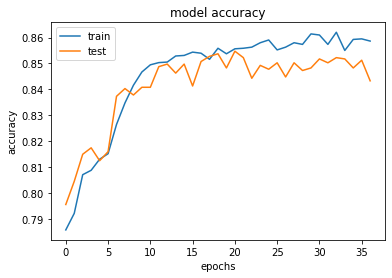

In [44]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('model accuracy')
plt.legend(['train','test'])

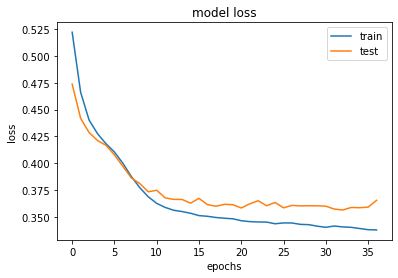

In [45]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('model loss')
plt.legend(['train','test'])

In [46]:
y_pred=classifier.predict(testx)
t_pred=(y_pred>= 0.5)

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [48]:
accuracy_score(t_pred,testy)

0.8593939393939394

In [49]:
confusion_matrix(t_pred,testy)

array([[2501,  308],
       [ 156,  335]], dtype=int64)

In [50]:
print(classification_report(t_pred,testy))

              precision    recall  f1-score   support

       False       0.94      0.89      0.92      2809
        True       0.52      0.68      0.59       491

    accuracy                           0.86      3300
   macro avg       0.73      0.79      0.75      3300
weighted avg       0.88      0.86      0.87      3300

